In [114]:
import pandas as pd
import librosa
import numpy as np

english_meta = pd.read_csv('./data/en/validated.tsv', sep='\t')
spanish_meta = pd.read_csv('./data/es/validated.tsv', sep='\t')
chinese_meta = pd.read_csv('./data/zh-CN/validated.tsv', sep='\t')

In [64]:
chinese_meta[pd.notna(chinese_meta['gender'])][['client_id','gender']].groupby('gender').count()

,client_id
gender,
female,32
male,4909


In [96]:
def sample_split(df):
    sample = df[df['gender']=='male'].sort_values('up_votes', ascending=False).head(1000)[['path']]
    sample['language'] = sample['path'].apply(lambda x: x.split('_')[2]) # add label
    sample = sample.sample(frac=1).reset_index(drop=True) # randomise
    return sample.iloc[0:600], sample.iloc[600:800], sample.iloc[800:1000] # returns train, test, valid

In [97]:
en_train, en_test, en_valid = sample_split(english_meta)
es_train, es_test, es_valid = sample_split(spanish_meta)
cn_train, cn_test, cn_valid = sample_split(chinese_meta)

In [102]:
train = pd.concat([en_train, es_train, cn_train])
test = pd.concat([en_test, es_test, cn_test])
valid = pd.concat([en_valid, es_valid, cn_valid])

In [120]:
yt.shape

(176753,)

In [121]:
y.shape

(176753,)

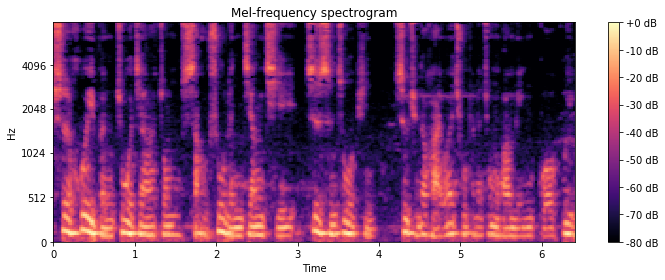

In [122]:
y, sr = librosa.load('./data/zh-CN/clips/common_voice_zh-CN_18772619.mp3')
yt, index = librosa.effects.trim(y, top_db=10)
librosa.feature.melspectrogram(y=yt, sr=sr)

# Using a pre-computed power spectrogram would give the same result:

D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

# Display of mel-frequency spectrogram coefficients, with custom
# arguments for mel filterbank construction (default is fmax=sr/2):

# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=yt, sr=sr, n_mels=128,
                                    fmax=8000)

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()


In [43]:
import IPython.display as ipd
ipd.Audio('./data/zh-CN/clips/common_voice_zh-CN_18772619.mp3')